# First model in classification  :    Logistic Regression   


In [327]:
# importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *

After importing Libraries, we import our Dataset and Visualize it

Note : make sure your dataset is in same directory of the notebook

In [328]:
#importing Dataset

dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:,2:4].values
y = dataset.iloc[:,4].values

 Run the next cell to visualize and see how the dataset looks like

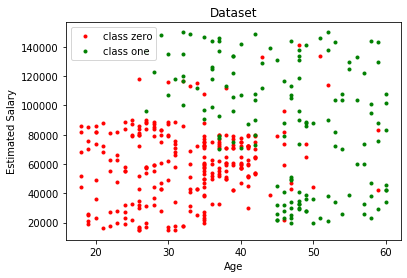

we should bulid a classifier that splits between two classes.


In [329]:
# plotting Dataset

data = dataset.iloc[:,2:5].values
data = data[data[:,2].argsort()]
plt.plot(data[:257,0],data[:257,1],'r.',label='class zero')
plt.plot(data[257:,0],data[257:,1],'g.',label='class one')
plt.title('Dataset')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
print("we should bulid a classifier that splits between two classes.")

Next step is : Datapreprocessing

- Complete missing data
- Categorical data
- Spliting dataset
- Feature scaling

Note : in this Dataset there is no missing data or categorical Data to convert
       so we will skip this two processes

In [330]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [331]:
# Scaling Features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Now we can bulid our model

1- Dealing with Dimensions:

- x_train  -> (n , m_train)
- x_test   -> (n , m_test)
- y_train  -> (1 , m_test)
- y_test   -> (1 , m_test)

Note:
- use ' x.shape ' to know dimensions of an array and ' x.reshape() ' to reshape 1 Rank array (size,)
- use 'x.T' to transpose 2D array

In [332]:
# checking Diemensions of dataset

### START CODE HERE ###




### END CODE HERE ###

(320, 2)

In [333]:
# Reshape your data

### START CODE HERE ###




### END CODE HERE ###

2- Initialize parameters (w,b)

- w.shape(n,1)  
- b.shape(1,1)

Note: w is array of zeros, so you can use ' np.zeros((n,1)) '

In [334]:
def initialize_parameters(x):
    '''
    This function initialize the parameters w,b by zeros
    
    returns:
    w: the weights term
    b: the bias term
    '''
    n = x.shape[0] 
    ### START CODE HERE ###
    
    
    ### END CODE HERE ###
    return w,b

3- calculate hypothesis throught Sigmoid function
$$ z = w^T x +b $$
$$ h(w,b) = (1/ (1+e^{-z})) $$

Note:
- you can use 'np.dot(x,y)' to perform matrix multiplcation
- you can use 'np.exp( x )' to make $e^{x}$, where x can be an array

In [335]:
def hypothesis_function(x,w,b):
    '''
    This function Calculate the predictions or hypothesis
    h(w,b)
    
    returns:
    y_hat : our predictions 
    '''
    ### START CODE HERE ###
    
    
    ### END CODE HERE ###
    
    return y_hat

4- Cost Function
	$$𝐽(𝑤,𝑏)=−1/𝑚 [\Sigma^{m}_{i=1}[(𝑦^{(𝑖)}log⁡(ℎ(𝑤,𝑏) (𝑥^{(𝑖)}))+((1−𝑦^{(𝑖)})log(⁡1−ℎ(𝑤,𝑏) (𝑥^{(𝑖)}))]$$
    
Note: 
- you can use 'log(x)' to calculate ln function 'ln(x)'
- you can use 'np.sum()' to calculate sum of an array

In [336]:
def cost_function(y,y_hat):
    '''
    This function Calculate the cost or error of predictions and
    actual values
    
    returns:
    J : Cost 'J(W,b)'
    '''
    m = y.shape[1]
    ### START CODE HERE ###
    
    ### END CODE HERE ###
    
    return J

6- Accuracy Function
$$ error = \frac{1}{m} \sum_{i=1}^m (|h_{w,b}(x^{(i)})-y^{(i)}|)    $$
$$ Accuracy = (1-error)*100 $$
Note:
- you should convert h(w,b) to 0 & 1 using threshold before calculating accuracy
<br>
if h(w,b) >= threshold: 
    h(w,b) = 1
<br>
else: 
    h(w,b) = 0

In [337]:
def Accuracy(y,y_hat,threshold = 0.5):
    '''
    This function Calculate the accuracy between predictions and
    actual values
    
    returns:
    accuracy
    '''
    m = y.shape[1]
    predictions = np.zeros(y_hat.shape)
    for i in range(m):
        # convert y_hat to 0 & 1
        ### START CODE HERE ###
        
        
        
        
        ### END CODE HERE ###
    # Calculate accuracy using new y_hat
    ### START CODE HERE ###
    
    
    ### END CODE HERE ###

    return accuracy,predictions

6- Calculate the gradients:
$$ hw,b(x) = w^{T}x +b$$
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(h_{w,b}(x)-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (h_{w,b}(x^{(i)})-y^{(i)})$$

We will assume that:
$$ \frac{\partial J}{\partial w} = dw $$
$$ \frac{\partial J}{\partial b} = db $$
Note:
- you can use 'np.dot()' for matrix multiplcation 
- you can use 'np.sum()' to calculate sum of an array

In [338]:
def calc_gradients(x,y,y_hat):
    '''
    This Function is to calculate the gradients of the parameters
    
    returns:
    dw , db: the gradient of the parameters
    '''
    m = y.shape[1]
    ### START CODE HERE ###
    
    
    ### END CODE HERE ###
    
    return dw,db

# Finally, We can build Logistic Regression Model
7- Gradient descent

The update rule of two parameters(w,b): 
<br>
$$ w = w - \alpha \text{ } dw$$, 
$$ b = b - \alpha \text{ } db$$
<br>
where $\alpha$ is the learning rate.
Note:
- you can use 'Cost.append(cost)',so that you can plot costfunction graph 

In [339]:
def Logistic_Regression(x,y,epochs =2000,learning_rate=0.01):
    '''
    arguments:
    x: the feature matrix with shape (n,m)
    y: the target vector with shape (1,m)
    epochs: the number of iterations
    learning_rate
    
    returns:
    w,b,Cost as Cost is a list of the cost each 100 iterations
    '''
    Cost = []
    
    #Initialize w,b using the function impelemented above
    ### START CODE HERE ###
    
    ### END CODE HERE ###    
    for i in range(epochs):
        #Calculate the gradients and update parameters using functions you build above
        ### START CODE HERE ###
        
        
        
        
        
        if(i % 100 == 0):
            # calculate cost and store it in Cost list
            
            
        ### END CODE HERE ### 
    return w,b,Cost 

 # Now we can train our logistic regression model  

In [340]:
# training our model

w,b,Cost = Logistic_Regression(x_train,y_train)

# Run the following cells to see your predictions

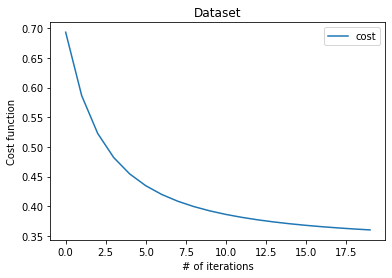

In [341]:
# ploting Cost function 

#index =np.zeros((1,len(Cost)))
index = []
for i in range(len(Cost)):
    index.append(i)
plt.plot(index,Cost,label='cost')
plt.title('Dataset')
plt.xlabel('# of iterations')
plt.ylabel('Cost function')
plt.legend()
plt.show()


In [342]:
# calculate accuracy and cost of training set

y_hat_train = hypothesis_function(x_train,w,b)
cost_train = cost_function(y_train,y_hat_train)
accuarcy_train,predictions_train = Accuracy(y_train,y_hat_train)
print("The cost of trainingset = ",cost_train)
print("The accuracy of trainingset = ",accuarcy_train)

The cost of trainingset =  0.3588842323027286
The accuracy of trainingset =  85.0


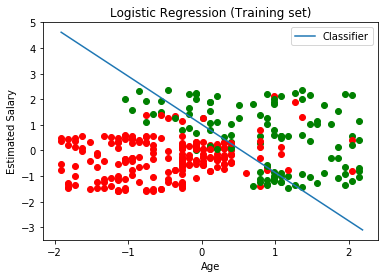

In [343]:
# ploting Decision Boundry of training set

x=np.arange(min(x_train[0,:]),max(x_train[0,:])+0.1,step=0.1)
y=(b+w[0,0]*x)/(-w[1,0])
for i in range(x_train.shape[1]):
    if(y_train[0,i] == 0):
        plt.scatter(x_train[0,i],x_train[1,i],c='r')
    else:
        plt.scatter(x_train[0,i],x_train[1,i],c='g')
plt.plot(x,y,label='Classifier')
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()        

In [346]:
# calculate accuracy and cost of testing set

y_hat_test = hypothesis_function(x_test,w,b)
cost_test = cost_function(y_test,y_hat_test)
accuarcy_test,predictions_test = Accuracy(y_test,y_hat_test)
print("The cost of testingset = ",cost_test)
print("The accuracy of testingset = ",accuarcy_test)

The cost of testingset =  0.362349977105103
The accuracy of testingset =  81.25


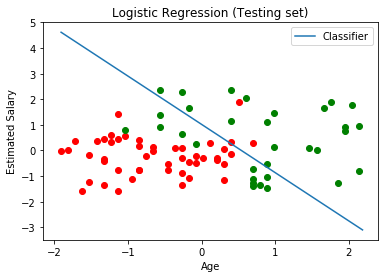

In [345]:
# ploting Decision Boundry of test set

x=np.arange(min(x_test[0,:]),max(x_test[0,:])+0.1,step=0.1)
y=(b+w[0,0]*x)/(-w[1,0])
for i in range(x_test.shape[1]):
    if(y_test[0,i] == 0):
        plt.scatter(x_test[0,i],x_test[1,i],c='r')
    else:
        plt.scatter(x_test[0,i],x_test[1,i],c='g')
plt.plot(x,y,label='Classifier')
plt.title('Logistic Regression (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()   
